## Data Analysis 1: U-test

**Random Sample of Positive and Negative Reviews for U-test**

In [124]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

transformed_reviews_df = pd.read_csv("transformed_reviews.csv") # Read the csv file

# Acquire an equal number of positive and negative reviews based on number of negative reviews 
# as the number of negative reviews < number of positive reviews
neg_reviews = transformed_reviews_df[transformed_reviews_df['SentimentLabels'] == 'NEGATIVE']
pos_reviews = transformed_reviews_df[transformed_reviews_df['SentimentLabels'] == 'POSITIVE'].sample(n=neg_reviews.shape[0])

neg_numerator = neg_reviews['HelpfulnessNumerator'] # Extract the helpfulness numerator values
pos_numerator = pos_reviews['HelpfulnessNumerator']  

print(pos_reviews.shape)
print(neg_reviews.shape)

(1789, 9)
(1789, 9)


**Normality Test**

Positive reviews normality test p-value: 1.6873021213683973e-64
Negative reviews normality test p-value: 1.3392323863178282e-49


Positive reviews normality test p-value after sqrt transform: 7.800020506751871e-44
Negative reviews normality test p-value after sqrt transform: 6.100861770336598e-70


Text(0.5, 0, 'Score')

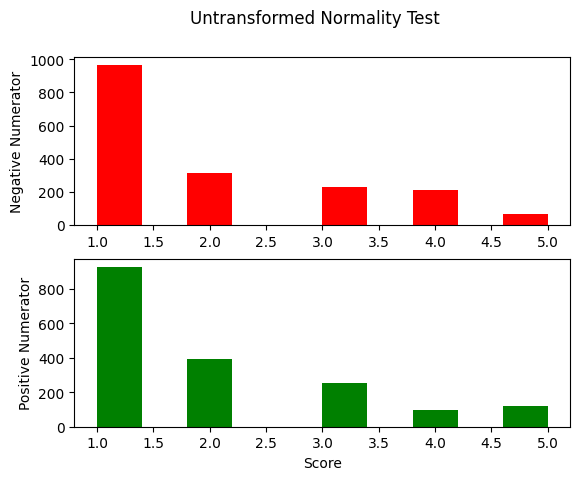

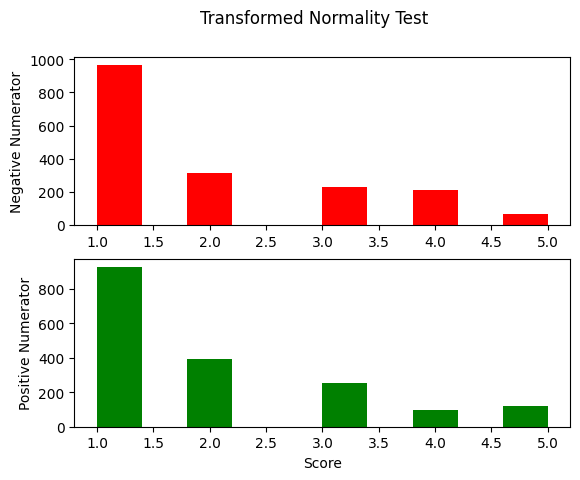

In [125]:
# Perform normality test
neg_num_normal = stats.normaltest(neg_numerator)
pos_num_normal = stats.normaltest(pos_numerator)
print("Positive reviews normality test p-value:", pos_num_normal.pvalue)
print("Negative reviews normality test p-value:", neg_num_normal.pvalue)
print("\n")

fig, histo = plt.subplots(2)
fig.suptitle('Untransformed Normality Test')
histo[0].hist(neg_numerator, color='red')
histo[0].set_ylabel('Negative Numerator')
histo[1].hist(pos_numerator, color='green')
histo[1].set_ylabel('Positive Numerator')
histo[1].set_xlabel('Score')

# Apply squareroot transformation
pos_numerator_sqrt = np.sqrt(pos_numerator)  
neg_numerator_sqrt = np.sqrt(neg_numerator)

# Perform normality test again
pos_num_normal = stats.normaltest(pos_numerator_sqrt)
neg_num_normal = stats.normaltest(neg_numerator_sqrt)
print("Positive reviews normality test p-value after sqrt transform:", pos_num_normal.pvalue)
print("Negative reviews normality test p-value after sqrt transform:", neg_num_normal.pvalue)

fig, histo = plt.subplots(2)
fig.suptitle('Transformed Normality Test')
histo[0].hist(neg_numerator, color='red')
histo[0].set_ylabel('Negative Numerator')
histo[1].hist(pos_numerator, color='green')
histo[1].set_ylabel('Positive Numerator')
histo[1].set_xlabel('Score')


**Equal Variance Test**

In [126]:
# Perform the equal variance test
ev_test = stats.levene(pos_numerator, neg_numerator)
print("Levene's test p-value:", ev_test.pvalue)

# Perform the equal variance test (w/ sqrt transformation)
ev_test_sqrt = stats.levene(pos_numerator_sqrt, neg_numerator_sqrt)
print("Levene's test p-value after sqrt transformation:", ev_test_sqrt.pvalue)

Levene's test p-value: 0.8042458337633791
Levene's test p-value after sqrt transformation: 0.8971603414168323


**Perform Independent T-Test**

In [127]:
t_stat, p_val = stats.ttest_ind(pos_numerator, neg_numerator, equal_var=False) # Assume no equal variance
print(pos_numerator.mean(), pos_numerator.std()) # Positive numerator mean and std
print(neg_numerator.mean(), neg_numerator.std()) # Negative numerator mean and std
print("t_stat:", t_stat)
print("p_val:", p_val)

1.9290106204583566 1.2114259233581863
1.9390721073225266 1.2165798273608066
t_stat: -0.2478743812966776
p_val: 0.8042458340197445


**Perform U-test**

In [128]:
u_stat, p_val = stats.mannwhitneyu(pos_numerator, neg_numerator)
print(pos_numerator.mean(), pos_numerator.std()) # Positive numerator mean and std
print(neg_numerator.mean(), neg_numerator.std()) # Negative numerator mean and std
print("p_val:", p_val)

1.9290106204583566 1.2114259233581863
1.9390721073225266 1.2165798273608066
p_val: 0.857947952467804
